In [93]:
import http.client
import json

connection = http.client.HTTPConnection('api.football-data.org')
headers = { 'X-Auth-Token': '94bbd37b3bf64a8580eedb39510b6047' }
connection.request('GET', '/v2/competitions/SA/standings', None, headers )
response = json.loads(connection.getresponse().read().decode())

In [94]:
response.keys()

dict_keys(['filters', 'competition', 'season', 'standings'])

In [95]:
from pandas.io.json import json_normalize
table_data = json_normalize(response['standings'], 
                            record_path ='table') 
table_data.head(3)

,draw,goalDifference,goalsAgainst,goalsFor,lost,playedGames,points,position,team,won
0,2,11,9,20,0,12,32,1,"{'id': 109, 'name': 'Juventus FC', 'crestUrl':...",10
1,1,14,12,26,1,12,31,2,"{'id': 108, 'name': 'FC Internazionale Milano'...",10
2,3,15,13,28,2,12,24,3,"{'id': 110, 'name': 'SS Lazio', 'crestUrl': 'h...",7


In [96]:
table_data['teamName'] = [i.get('name') for i in table_data.team]
table_data.head(3)

,draw,goalDifference,goalsAgainst,goalsFor,lost,playedGames,points,position,team,won,teamName
0,2,11,9,20,0,12,32,1,"{'id': 109, 'name': 'Juventus FC', 'crestUrl':...",10,Juventus FC
1,1,14,12,26,1,12,31,2,"{'id': 108, 'name': 'FC Internazionale Milano'...",10,FC Internazionale Milano
2,3,15,13,28,2,12,24,3,"{'id': 110, 'name': 'SS Lazio', 'crestUrl': 'h...",7,SS Lazio


In [97]:
table_data = table_data.drop(['team'], axis = 1)

In [98]:
table_data = table_data.reindex(['position', 'teamName', 'playedGames', 'won', 'draw', 'lost', 'points', 'goalsFor', 'goalsAgainst', 
                                 'goalDifference'], axis = 1)
table_data.head()

,position,teamName,playedGames,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference
0,1,Juventus FC,12,10,2,0,32,20,9,11
1,2,FC Internazionale Milano,12,10,1,1,31,26,12,14
2,3,SS Lazio,12,7,3,2,24,28,13,15
3,4,Cagliari Calcio,12,7,3,2,24,23,12,11
4,5,Atalanta BC,12,6,4,2,22,30,18,12


The teams were splitted into 4 categories:
- top include all times who scored points more than the 75% percentile (points > 22)
- upper middle include the teams who scored more than the average and below the 75% percentile (16.55 < points < 22)
- lower middle include the teams who scored less than the average and above the 25% percentile (11.5 < points < 16.55)
- bottom include all times who scored points less than the 25% percentile (points < 11.5)

In [101]:
table_data['rank'] = table_data['teamName']
top_teams = ['Juventus FC', 'FC Internazionale Milano', 'SS Lazio', 'Cagliari Calcio', 'Atalanta BC', 'AS Roma']
bottom_teams = ['Brescia Calcio', 'SPAL 2013', 'UC Sampdoria', 'Genoa CFC', 'US Lecce']
upper_teams = ['SSC Napoli', 'Parma Calcio 1913']
lower_teams = ['ACF Fiorentina', 'Hellas Verona FC', 'Udinese Calcio', 'Torino FC', 'US Sassuolo Calcio', 'AC Milan', 
               'Bologna FC 1909']
for team in top_teams:
    table_data['rank'] = table_data['rank'].replace(team, 'top')
for team in bottom_teams:
    table_data['rank'] = table_data['rank'].replace(team, 'bottom')
for team in upper_teams:
    table_data['rank'] = table_data['rank'].replace(team, 'upper_middle')
for team in lower_teams:
    table_data['rank'] = table_data['rank'].replace(team, 'lower_middle')

The table_data dataframe splitted into 3 dataframes:
- total (Includes all the statisctis for the teams games)
- home (Includes all the statisctis for the teams games at home)
- away (Includes all the statisctis for the teams games at away)

In [134]:
total = table_data[0:20]
home = table_data[20:40]
away = table_data[40:60]

,position,teamName,playedGames,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference,rank
0,1,Juventus FC,12,10,2,0,32,20,9,11,top
1,2,FC Internazionale Milano,12,10,1,1,31,26,12,14,top
2,3,SS Lazio,12,7,3,2,24,28,13,15,top
3,4,Cagliari Calcio,12,7,3,2,24,23,12,11,top
4,5,Atalanta BC,12,6,4,2,22,30,18,12,top
5,6,AS Roma,12,6,4,2,22,20,14,6,top
6,7,SSC Napoli,12,5,4,3,19,21,15,6,upper_middle
7,8,Parma Calcio 1913,12,5,2,5,17,18,15,3,upper_middle
8,9,ACF Fiorentina,12,4,4,4,16,18,19,-1,lower_middle
9,10,Hellas Verona FC,12,4,3,5,15,10,11,-1,lower_middle


In [196]:
total.head()

,position,teamName,playedGames,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference,rank,position_norm,playedGames_norm,won_norm,draw_norm,lost_norm,points_norm,goalsFor_norm,goalsAgainst_norm,goalDifference_norm
0,1,Juventus FC,12,10,2,0,32,20,9,11,top,0.018666,0.225414,0.428353,0.159111,0.000000,0.397370,0.246108,0.115366,0.271295
1,2,FC Internazionale Milano,12,10,1,1,31,26,12,14,top,0.037333,0.225414,0.428353,0.079556,0.042757,0.384952,0.319941,0.153821,0.345285
2,3,SS Lazio,12,7,3,2,24,28,13,15,top,0.055999,0.225414,0.299847,0.238667,0.085514,0.298027,0.344552,0.166639,0.369948
3,4,Cagliari Calcio,12,7,3,2,24,23,12,11,top,0.074665,0.225414,0.299847,0.238667,0.085514,0.298027,0.283025,0.153821,0.271295
4,5,Atalanta BC,12,6,4,2,22,30,18,12,top,0.093332,0.225414,0.257012,0.318223,0.085514,0.273192,0.369163,0.230731,0.295958


In [105]:
total.describe()

,position,playedGames,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,11.900000,4.650000,2.600000,4.650000,16.550000,16.900000,16.900000,0.000000
std,5.91608,0.307794,2.433862,1.095445,2.455391,7.279929,6.851047,4.435503,9.301952
min,1.00000,11.000000,2.000000,1.000000,0.000000,7.000000,7.000000,9.000000,-12.000000
25%,5.75000,12.000000,2.750000,2.000000,2.000000,11.500000,10.750000,13.750000,-10.000000
50%,10.50000,12.000000,4.000000,3.000000,5.500000,14.500000,17.000000,17.500000,-1.000000
75%,15.25000,12.000000,6.000000,3.250000,6.250000,22.000000,21.000000,19.250000,7.250000
max,20.00000,12.000000,10.000000,4.000000,8.000000,32.000000,30.000000,26.000000,15.000000


In [197]:
home.head()

,position,teamName,playedGames,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference,rank,position_norm,playedGames_norm,won_norm,draw_norm,lost_norm,points_norm,goalsFor_norm,goalsAgainst_norm,goalDifference_norm
20,1,Juventus FC,6,6,0,0,18,13,6,7,top,0.018666,0.225414,0.428353,0.159111,0.000000,0.397370,0.246108,0.115366,0.271295
21,2,SS Lazio,6,4,2,0,14,18,6,12,top,0.037333,0.225414,0.428353,0.079556,0.042757,0.384952,0.319941,0.153821,0.345285
22,3,Cagliari Calcio,7,4,1,2,13,15,9,6,top,0.055999,0.225414,0.299847,0.238667,0.085514,0.298027,0.344552,0.166639,0.369948
23,4,FC Internazionale Milano,6,4,1,1,13,11,5,6,top,0.074665,0.225414,0.299847,0.238667,0.085514,0.298027,0.283025,0.153821,0.271295
24,5,Parma Calcio 1913,7,4,0,3,12,12,8,4,upper_middle,0.093332,0.225414,0.257012,0.318223,0.085514,0.273192,0.369163,0.230731,0.295958


In [114]:
home.describe()

,position,playedGames,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,5.950000,2.550000,1.300000,2.100000,8.950000,9.050000,7.850000,1.200000
std,5.91608,0.604805,1.431782,0.801315,1.071153,3.979884,4.370656,2.254236,4.741752
min,1.00000,5.000000,0.000000,0.000000,0.000000,1.000000,3.000000,4.000000,-7.000000
25%,5.75000,6.000000,2.000000,1.000000,1.750000,7.000000,5.750000,6.000000,-2.250000
50%,10.50000,6.000000,2.000000,1.000000,2.000000,8.000000,8.000000,8.000000,0.500000
75%,15.25000,6.000000,3.250000,2.000000,3.000000,11.250000,12.250000,9.000000,4.250000
max,20.00000,7.000000,6.000000,3.000000,4.000000,18.000000,18.000000,12.000000,12.000000


In [198]:
away.head()

,position,teamName,playedGames,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference,rank,position_norm,playedGames_norm,won_norm,draw_norm,lost_norm,points_norm,goalsFor_norm,goalsAgainst_norm,goalDifference_norm
40,1,FC Internazionale Milano,6,6,0,0,18,15,7,8,top,0.018666,0.225414,0.428353,0.159111,0.000000,0.397370,0.246108,0.115366,0.271295
41,2,Atalanta BC,7,4,3,0,15,16,9,7,top,0.037333,0.225414,0.428353,0.079556,0.042757,0.384952,0.319941,0.153821,0.345285
42,3,Juventus FC,6,4,2,0,14,7,3,4,top,0.055999,0.225414,0.299847,0.238667,0.085514,0.298027,0.344552,0.166639,0.369948
43,4,Cagliari Calcio,5,3,2,0,11,8,3,5,top,0.074665,0.225414,0.299847,0.238667,0.085514,0.298027,0.283025,0.153821,0.271295
44,5,AS Roma,6,3,2,1,11,8,4,4,top,0.093332,0.225414,0.257012,0.318223,0.085514,0.273192,0.369163,0.230731,0.295958


In [119]:
away.describe()

,position,playedGames,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,5.950000,2.100000,1.300000,2.550000,7.600000,7.850000,9.050000,-1.200000
std,5.91608,0.604805,1.447321,0.923381,1.669384,4.453266,3.923948,3.762348,5.277559
min,1.00000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,-11.000000
25%,5.75000,6.000000,1.000000,0.750000,1.750000,4.750000,5.000000,7.000000,-4.250000
50%,10.50000,6.000000,2.000000,1.500000,3.000000,6.500000,7.500000,9.000000,-2.000000
75%,15.25000,6.000000,3.000000,2.000000,4.000000,10.250000,10.000000,11.000000,3.250000
max,20.00000,7.000000,6.000000,3.000000,5.000000,18.000000,16.000000,17.000000,8.000000


### Teams Points (total - home - away)

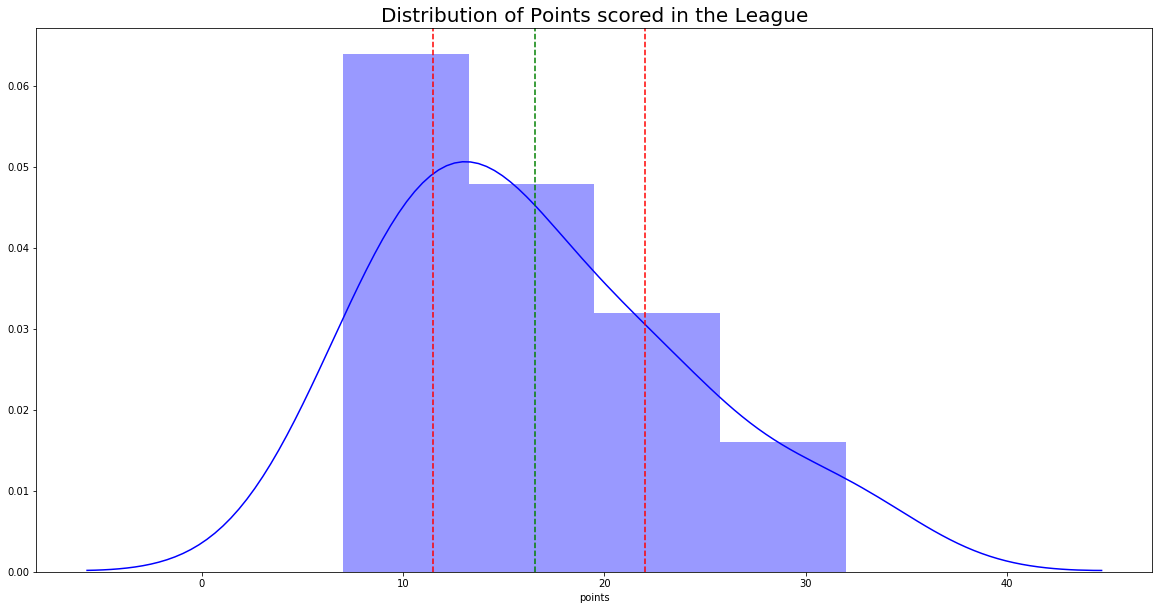

In [193]:
plt.figure(figsize = (20,10))
sns.distplot(total.points, color = 'blue')
plt.axvline(11.5, 0 ,1, color = 'red', linestyle = 'dashed')
plt.axvline(22, 0 ,1, color = 'red', linestyle = 'dashed')
plt.axvline(16.55, 0 ,1, color = 'green', linestyle = 'dashed')
plt.title("Distribution of Points scored in the League", fontsize = 20)
plt.show()

The distribution of the points is slightly skewed to the right, which mean teams who score less than the average are more than the temas who scores more. This leagure has 8 teams score more than  average and 12 below the average which shows slight in balance in performance between the two groups. The dashed green line represents the mean, while the red dashed lines represents the 25% and 75% percentiles

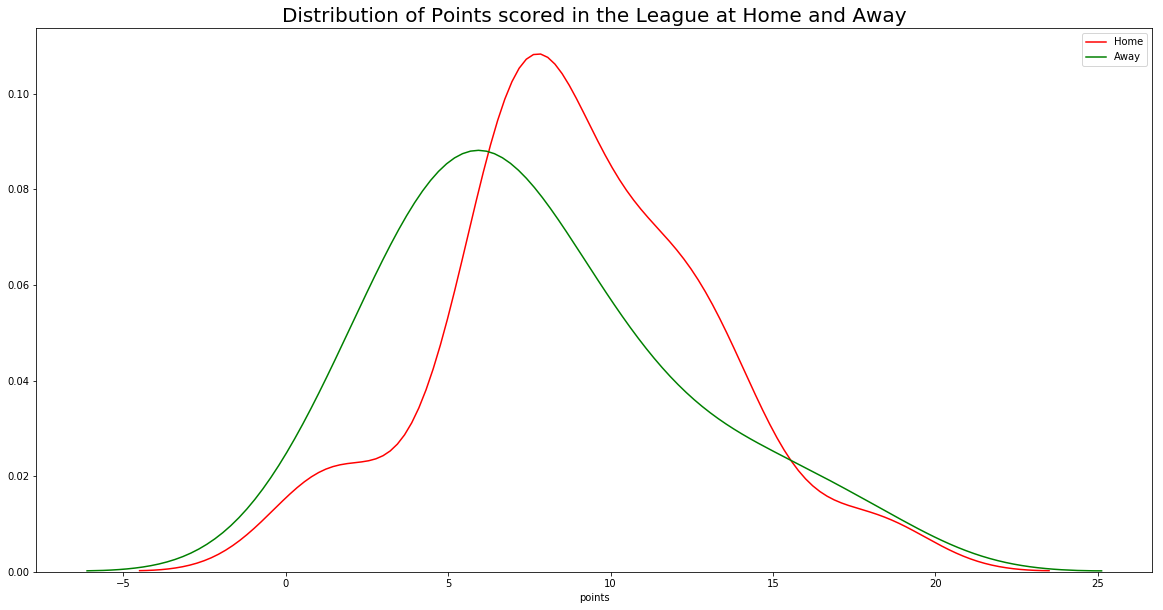

In [195]:
plt.figure(figsize = (20,10))
sns.distplot(home.points, color = 'red', hist = False, label="Home")
sns.distplot(away.points, color = 'green', hist = False, label="Away")
plt.title("Distribution of Points scored in the League at Home and Away", fontsize = 20)
plt.show()

The distribution of points scored away are more skewed to the right compare to at home points.This means that teams are less tend to score point away from home. 

### Goals Scores (total - home - away)

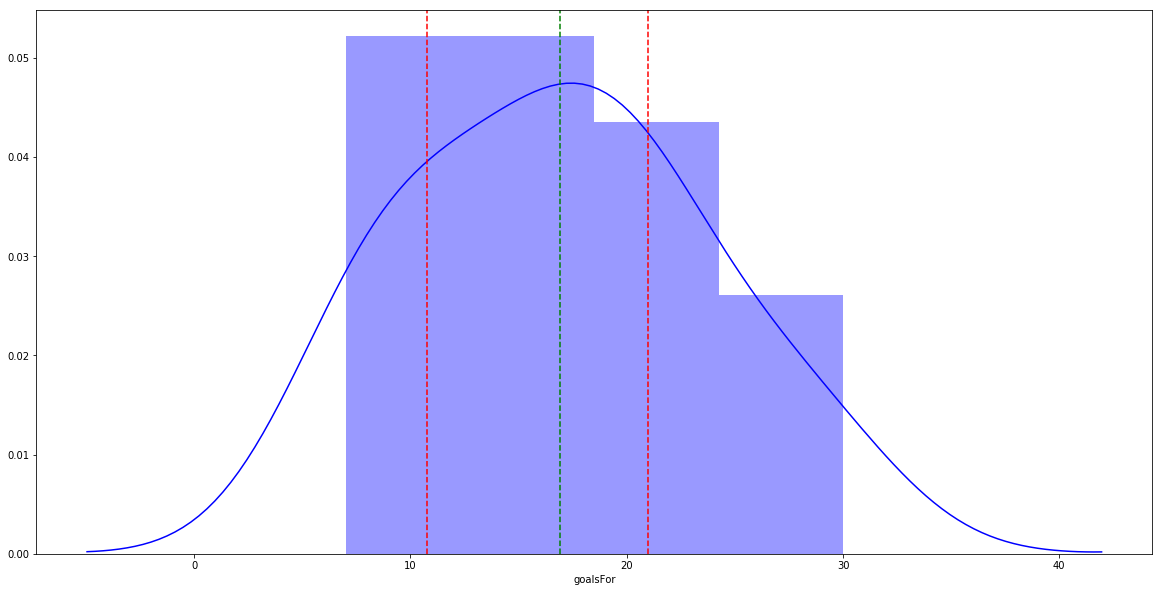

In [186]:
plt.figure(figsize = (20,10))
sns.distplot(total.goalsFor, color = 'blue')
plt.axvline(10.75, 0 ,1, color = 'red', linestyle = 'dashed')
plt.axvline(21, 0 ,1, color = 'red', linestyle = 'dashed')
plt.axvline(16.9, 0 ,1, color = 'green', linestyle = 'dashed')

The distrubtion of goals scored by the teams is less skeded to the right if you compare it to points distribution. The distibution is very close to be symetric (50% of the teams scored more than average). The leagure looks very close to be abalnced league in terms of goals scorring.

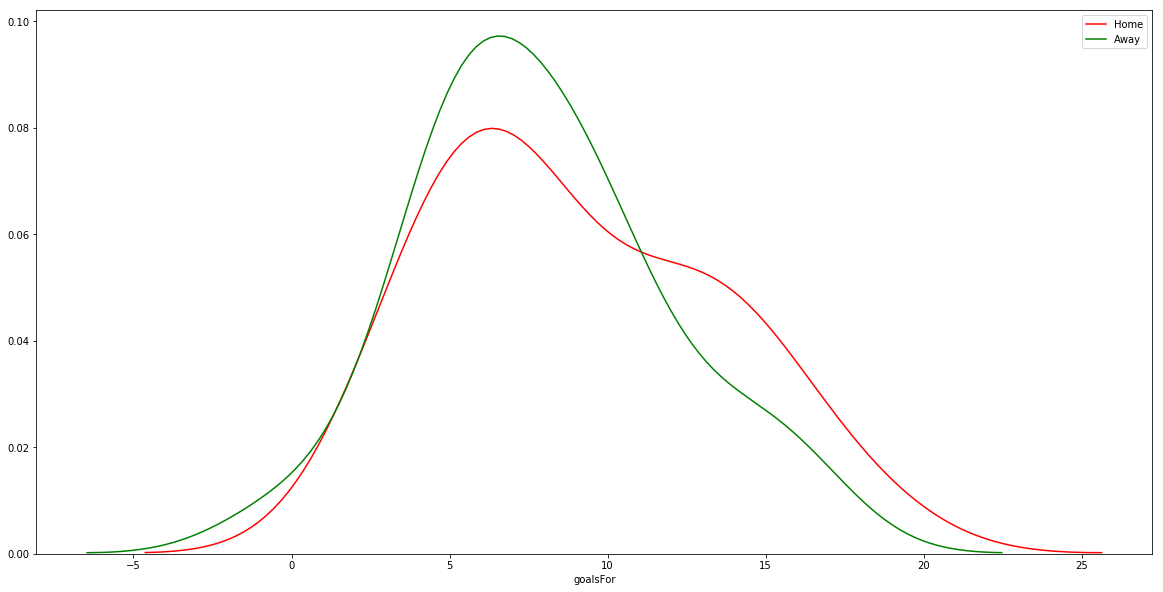

In [187]:
plt.figure(figsize = (20,10))
sns.distplot(home.goalsFor, color = 'red', hist = False, label="Home")
sns.distplot(away.goalsFor, color = 'green', hist = False, label="Away")

both home and away distribution are very close to each other. No big difference . The teams play at home has a more spread distribution. Both distributions are more skewed tpo the right compare to total goals distribution.  

## Total Games

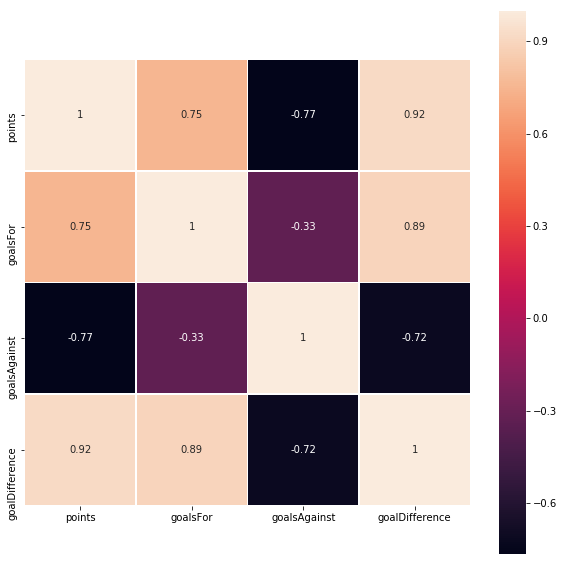

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat_total = total[['points', 'goalsFor', 'goalsAgainst', 'goalDifference']].corr()
plt.figure(figsize = (10,10))
sns.heatmap(corrmat_total, square = True, annot = True, linewidths = 0.5)
plt.show()

In general there is a high correlation between the features except between goals for and goals against. Points and goal difference have the highest correlation of 92%. the correlation between the points and goals against is slightly higher compare to the correlation with goals scored. this shows that teams who have strong deffence are more likley to score highewr points.

### Goals For vs goals Against (Total Games)

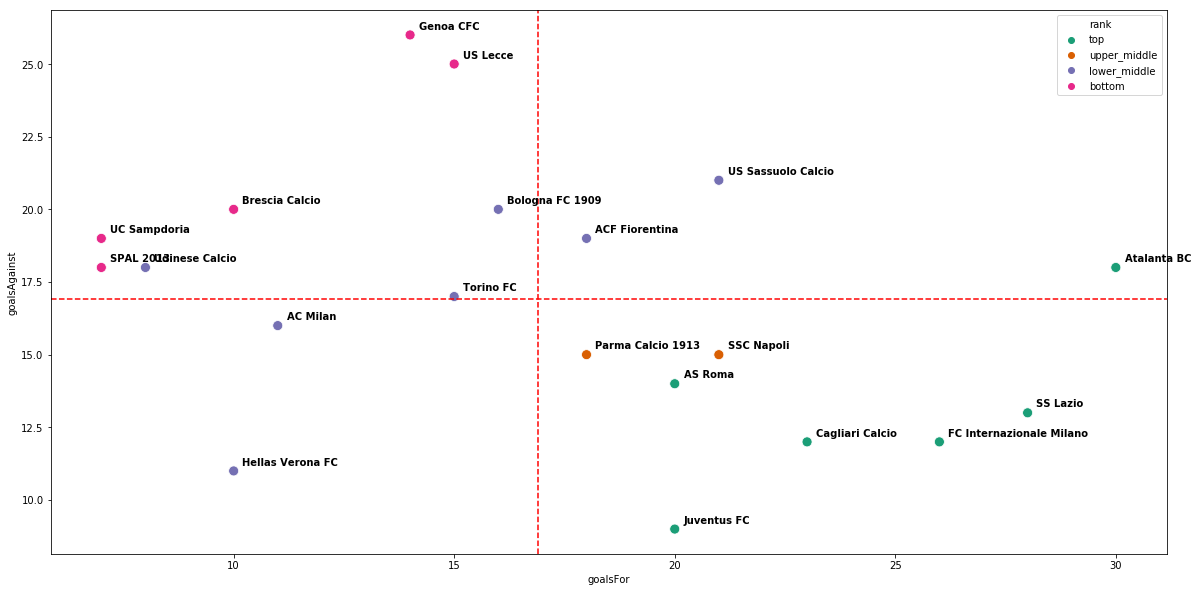

In [147]:
plt.figure(figsize = (20,10))
sns.scatterplot(x="goalsFor", y="goalsAgainst", data=total, palette='Dark2', hue = 'rank', s = 100)
for line in range(0,total.shape[0]):
     plt.text(total.goalsFor[line]+0.2, total.goalsAgainst[line]+0.2, total.teamName[line], horizontalalignment='left', 
             size='medium', color='black', weight='semibold')
plt.axvline(16.9, 0 ,1, color = 'red', linestyle = 'dashed')
plt.axhline(16.9, 0 ,1, color = 'red', linestyle = 'dashed')
plt.show()

- Most of the top teams are in the quadrant where they scored goals more than average and receiving goals less than average except "Atalanta" who is making exceptional performance in offence but less than  average in deffence. It looks like the team need to deal with deffence problems.
- Napoli and Parma are in the best quadrant but are close to the boarders.
- The top left quadrant represent the teams who are perforning less than average (40% of the teams are in this qudrant). Some of these teams like (Bologna and Torino) might improve their performance since they are close to the boarders.
- The top right quadrant represent the teams who are unbalanced (offinsive treams with relatively poor deffence). these teams are Atalanta, Sassuolo and Fiorentina
- The lower left quadrant represent deffensive teams with poor attack performance. Team like "Hellas Verona for example has a very strong deffense like a top team but a very poor attack like a bottom team resulting in the team ranked 10th in the league.

### Points vs goals Difference (Total Games)

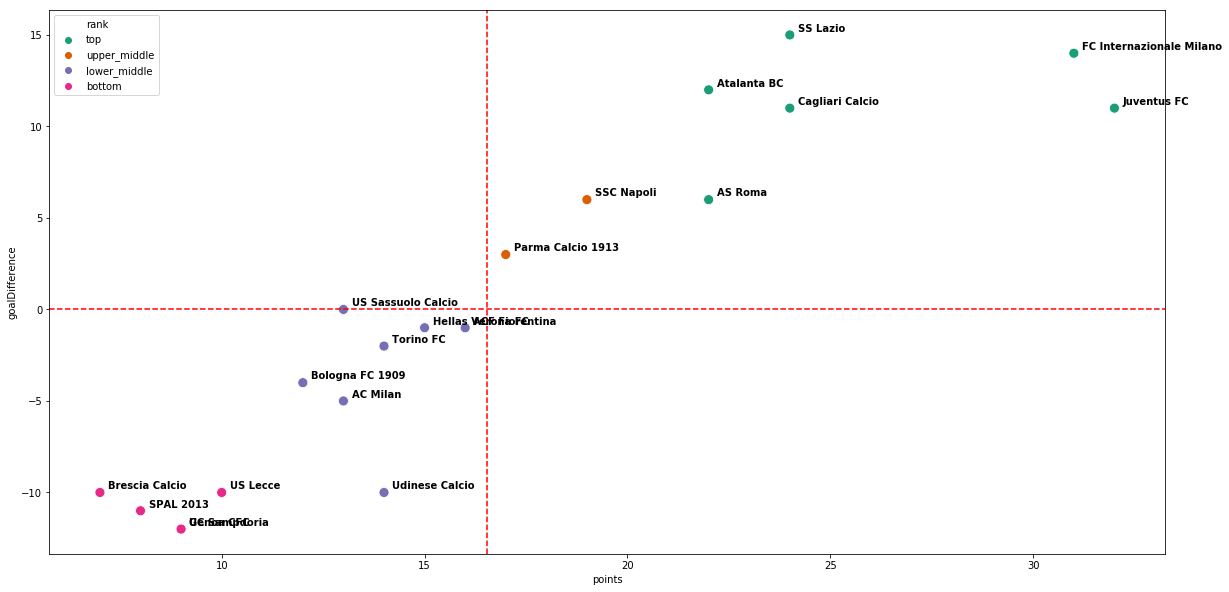

In [139]:
plt.figure(figsize = (20,10))
p1 = sns.scatterplot(x="points", y="goalDifference", data=total, palette='Dark2', hue = 'rank', s = 100)
for line in range(0,total.shape[0]):
     p1.text(total.points[line]+0.2, total.goalDifference[line]+0.2, total.teamName[line], horizontalalignment='left', 
             size='medium', color='black', weight='semibold')
plt.axvline(16.55, 0 ,1, color = 'red', linestyle = 'dashed')
plt.axhline(0, 0 ,1, color = 'red', linestyle = 'dashed')
plt.show()

Due to the high correlation all the teams are positioned in 2 quadrant. Top and upper middle teams in 1 quadrant. lower middle and bottom temas in a different quadrant 

## Home Games

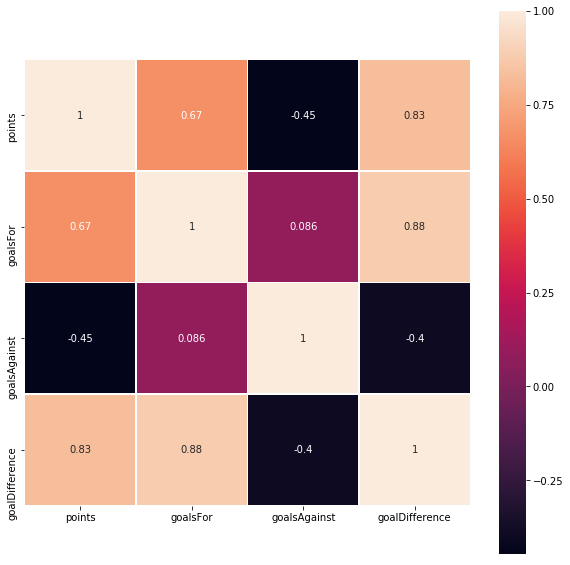

In [115]:
import matplotlib.pyplot as plt
corrmat_home = home[['points', 'goalsFor', 'goalsAgainst', 'goalDifference']].corr()
plt.figure(figsize = (10,10))
sns.heatmap(corrmat_home, square = True, annot = True, linewidths = 0.5)
plt.show()

The correlation between features is lower than the total games, especially with goals against. It looks liek at home you need to score goals if you want ot get points.

### Goals For vs goals Against (Home Games)

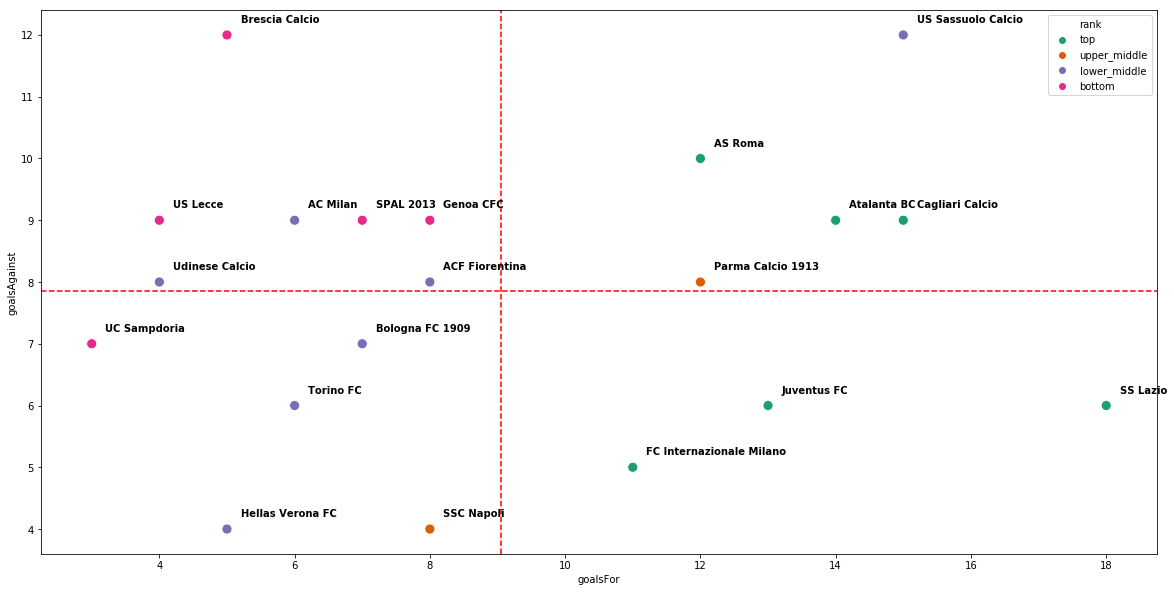

In [161]:
plt.figure(figsize = (20,10))
sns.scatterplot(x="goalsFor", y="goalsAgainst", data=home, palette='Dark2', hue = 'rank', s = 100)
for line in range(20,40):
     plt.text(home.goalsFor[line]+0.2, home.goalsAgainst[line]+0.2, home.teamName[line], horizontalalignment='left', 
             size='medium', color='black', weight='semibold')
plt.axvline(9.05, 0 ,1, color = 'red', linestyle = 'dashed')
plt.axhline(7.85, 0 ,1, color = 'red', linestyle = 'dashed')
plt.show()

At home things are different:
- Only Lazio, Juventus and Inter are in the top peroramnce quadrant. These teams are very strong at home (espicially lazio).
- Out of the top teams (Atalanta, Roma and Cagliari) are performing less than average at home and receiving too many goals. parma who is an upper middle team is performing better than them deffensivly at home.
- Napoli is one of the 2 top teams in deffense at home (only 4 goals) but they have a poor attack performance.
- Despite the poor position of sampdoria in the table, they have a relativly good deffence, they need to improve in attack if they want to claim up the table.

### Points vs goals Difference (Home Games)

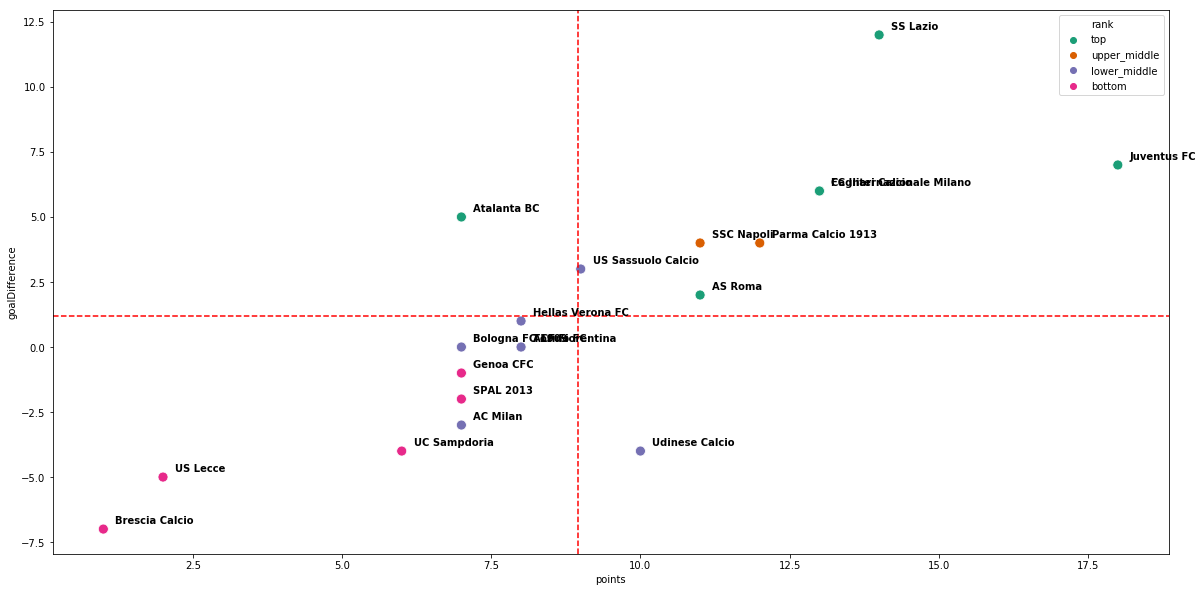

In [158]:
plt.figure(figsize = (20,10))
sns.scatterplot(x="points", y="goalDifference", data=home, palette='Dark2', hue = 'rank', s = 100)
plt.axvline(8.95, 0 ,1, color = 'red', linestyle = 'dashed')
plt.axhline(1.2, 0 ,1, color = 'red', linestyle = 'dashed')
for line in range(20,40):
     plt.text(home.points[line]+0.2, home.goalDifference[line]+0.2, home.teamName[line], horizontalalignment='left', 
             size='medium', color='black', weight='semibold')
plt.show()

- No big difference compare to the total games plot but there are 2 major differences:
    - Atalanta performing weel ion terms of goals differences scored points less than average at home. the team is strugling at home.
    - Udinese who is doing bad in general is ranked 8th in terms of points scored at home.

## Away Games

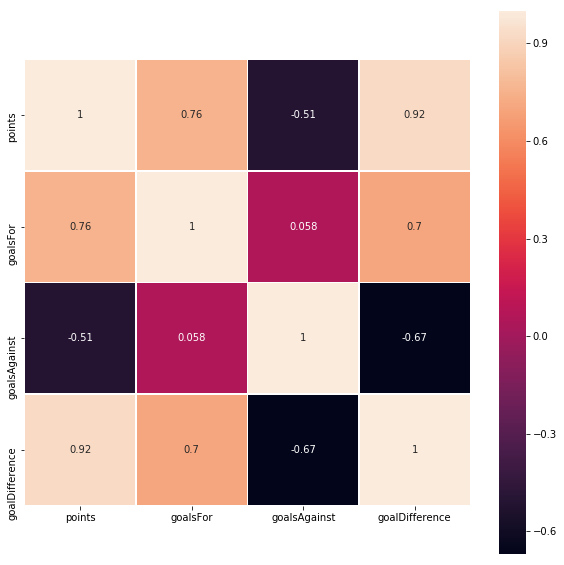

In [120]:
import matplotlib.pyplot as plt
corrmat_away = away[['points', 'goalsFor', 'goalsAgainst', 'goalDifference']].corr()
plt.figure(figsize = (10,10))
sns.heatmap(corrmat_away, square = True, annot = True, linewidths = 0.5)
plt.show()

Correlation is high between gaols differnce and total points as in total games.but the correlation with goals against is still low. Also, away teams who score are more willing to score points. this shows the importance of offense play.

### Goals For vs goals Against (Away Games)

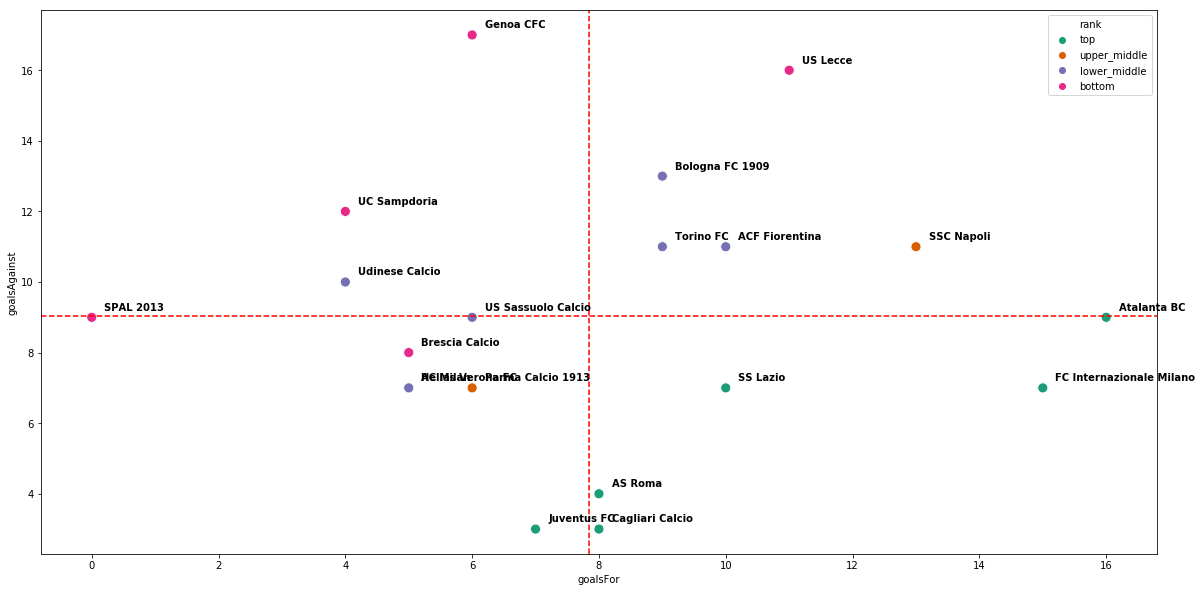

In [162]:
plt.figure(figsize = (20,10))
p3 = sns.scatterplot(x="goalsFor", y="goalsAgainst", hue='rank', data=away, palette='Dark2', s = 100)
plt.axvline(7.85, 0 ,1, color = 'red', linestyle = 'dashed')
plt.axhline(9.05, 0 ,1, color = 'red', linestyle = 'dashed')
for l in range(40,60):
     p3.text(away.goalsFor[l]+0.2, away.goalsAgainst[l]+0.2, away.teamName[l], horizontalalignment='left', 
             size='medium', color='black', weight='semibold')
plt.show()

- Most of the top teams are perorming well away despite being very close to the boarders. Atalanta and Inter are the best out of home despite receving goals more than the other top teams.
- Juventus is out of the top performers quadrant due to less tha  average attack away. Roma and Cagliari are close to the boarders as well. All the three teams performe great defensivly away but jus average performance offensivly.
- Away teams are more close ot the boarders as poerformanc is not as sifferent as the case with home games

### Points vs goals Difference (Away Games)

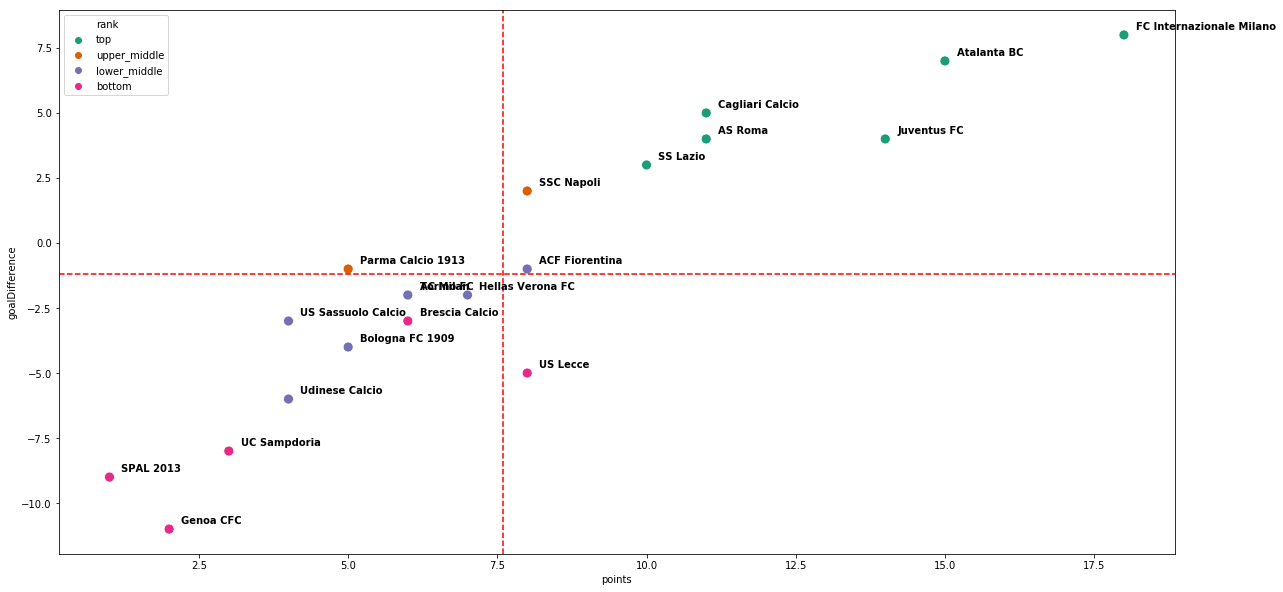

In [166]:
plt.figure(figsize = (20,10))
sns.scatterplot(x="points", y="goalDifference", data=away, palette='Dark2', hue = 'rank', s = 100)
plt.axvline(7.6, 0 ,1, color = 'red', linestyle = 'dashed')
plt.axhline(-1.2, 0 ,1, color = 'red', linestyle = 'dashed')
for line in range(40,60):
     plt.text(away.points[line]+0.2, away.goalDifference[line]+0.2, away.teamName[line], horizontalalignment='left', 
             size='medium', color='black', weight='semibold')
plt.show()

- No big difference compare to the total games plot

## Conclusion

- Top teams are slightly dominating the league sicne all distributions are skewed to the right.
- Top teams:
    - Juventus: is in top of the table but they have issues:
        - the lowest scoring team out of the top teams (Need to fix offense issues espicially on away games)
    - Inter Milan: The team is perforing well but:
        - Performance at home is worse than away (they are the weakest attack team at home compare to top teams)
    - Lazio: Good peformance in terms of goals for and against with issues in scoring points:
        - bif discrepancy in terms of points scoring at home vs away. They are one of the best at home but the worst among the top teams away.
    - Cagliari: stable performance with an issue:
        - The team is scoring more and receiving more goals at home. scoring less and receiving less goasl away. they can do better if they focuse on defense at home, and also score more away.
    - Atalanta: Unbalanced team, leagure champion performancxe offensivly, poor teams performance deffensivly:
        - The other problem is thier performance at hoem which is poor compare to away games.
    - Roma: Is the least performing team out of the top 6:
        - They are one of the worst teams offensivly and defensivly at home compare to the top teams. They are strong diffensivly away but not offfensivly. The team need to score more goals and deal with defense issues at home.